In [ ]:
!pip install statsmodels

In [1]:
import pandas as pd
import seaborn as sns

from statsmodels.formula.api import ols

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/allatambov/PyPerm24/main/Salaries.csv")

In [4]:
df.rename(columns = {"yrs.since.phd" : "phd", 
                    "yrs.service" : "service"}, inplace = True)

In [6]:
sns.set_theme(style = "whitegrid")

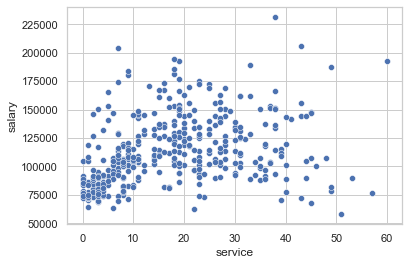

In [7]:
sns.scatterplot(data = df, x = "service", y = "salary");

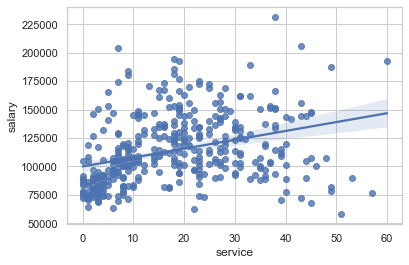

In [8]:
sns.regplot(data = df, x = "service", y = "salary");

In [10]:
model0 = ols("salary ~ service", df).fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     49.85
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           7.53e-12
Time:                        09:54:23   Log-Likelihood:                -4635.7
No. Observations:                 397   AIC:                             9275.
Df Residuals:                     395   BIC:                             9283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.997e+04   2416.605     41.370      0.0

In [ ]:
# salary^ = 99970 + 780 * service

In [11]:
print(model0.params)

Intercept    99974.652866
service        779.569114
dtype: float64


In [12]:
print(model0.rsquared)

0.11205399790940607


In [13]:
df[["salary", "service"]].corr()

,salary,service
salary,1.000000,0.334745
service,0.334745,1.000000


In [14]:
model0.predict(df)

0      114006.896913
1      112447.758685
2      102313.360207
3      130377.848300
4      131936.986528
           ...      
392    123361.726277
393    114786.466027
394    119463.880709
395    111668.189572
396    103092.929321
Length: 397, dtype: float64

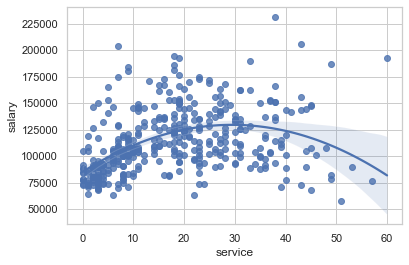

In [15]:
sns.regplot(data = df, x = "service", y = "salary", order = 2);

In [16]:
model1 = ols("salary ~ service + service^2", df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     25.95
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           2.59e-11
Time:                        10:14:05   Log-Likelihood:                -4634.7
No. Observations:                 397   AIC:                             9275.
Df Residuals:                     394   BIC:                             9287.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.966e+04   2424.113     41.113      

In [17]:
model1.params

Intercept      99663.690023
service         1786.794939
service ^ 2    -1006.556793
dtype: float64

In [ ]:
# 99663 + 1786 * service - 1006 * service ^ 2

In [19]:
model2 = ols("salary ~ service + phd", df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     45.71
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           1.40e-18
Time:                        10:23:15   Log-Likelihood:                -4617.9
No. Observations:                 397   AIC:                             9242.
Df Residuals:                     394   BIC:                             9254.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.991e+04   2843.560     31.620      0.0

In [20]:
model3 = ols("salary ~ service + phd + sex", df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     31.75
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           2.13e-18
Time:                        10:28:06   Log-Likelihood:                -4616.2
No. Observations:                 397   AIC:                             9240.
Df Residuals:                     393   BIC:                             9256.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.288e+04   4800.630     17.264      

In [ ]:
# salary^ = 82880 + 8457 * Male - -649 * service + 1552 * phd

In [21]:
model3.predict(exog = {"service" : 8, "phd" : 0, "sex" : "Male"})

0    86134.890583
dtype: float64

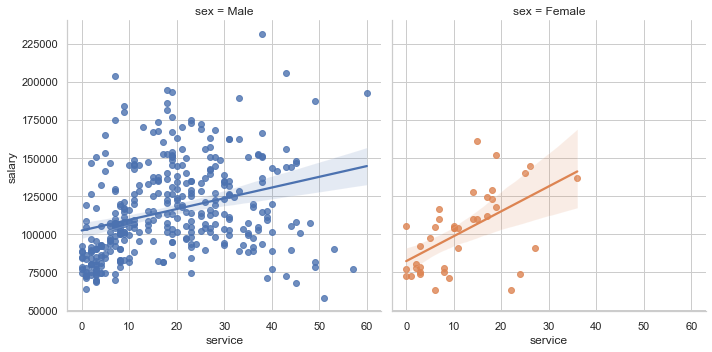

In [23]:
# interaction effects / interactions

sns.lmplot(data = df, x = "service", y = "salary", hue = "sex", col = "sex");

In [29]:
model4 = ols("salary ~ phd + sex * service", df).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     24.60
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           3.47e-18
Time:                        10:47:56   Log-Likelihood:                -4614.8
No. Observations:                 397   AIC:                             9240.
Df Residuals:                     392   BIC:                             9260.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            7.359e+04   7

In [ ]:
# 73590 + 18520 * Male + 1541 * phd + 169 * service - 847 * Male * service

In [ ]:
# marginal effect of service

# 169 - 847 * Male

# Male = 0
# effect of service 169

# Male = 1
# effect of service 169 - 847 = -678

# marginal effect of sex

# 18520 - 847 * service

# service = 10

# 10050

In [31]:
18520 - 847 * 10

10050